In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [25]:
csv_path = Path(r"C:\Users\quint\Downloads\Project 1 Data Sets\NCHS_-_Leading_Causes_of_Death__United_States_20240411.csv")
death_df = pd.read_csv(csv_path)
death_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [26]:
#Grabbing all causes of death
causename_column = death_df["Cause Name"]
unique_names = causename_column.unique()
print(unique_names)

['Unintentional injuries' 'All causes' "Alzheimer's disease" 'Stroke'
 'CLRD' 'Diabetes' 'Heart disease' 'Influenza and pneumonia' 'Suicide'
 'Cancer' 'Kidney disease']


In [27]:
#Checking what the total amount for deaths of heart disease to compare in first graph
heart_disease_df = death_df.loc[(death_df["Cause Name"].str.contains("Heart disease")) & (death_df["State"] == "United States")]
sum_hd_df = heart_disease_df["Deaths"].sum()
print(sum_hd_df)

12222640


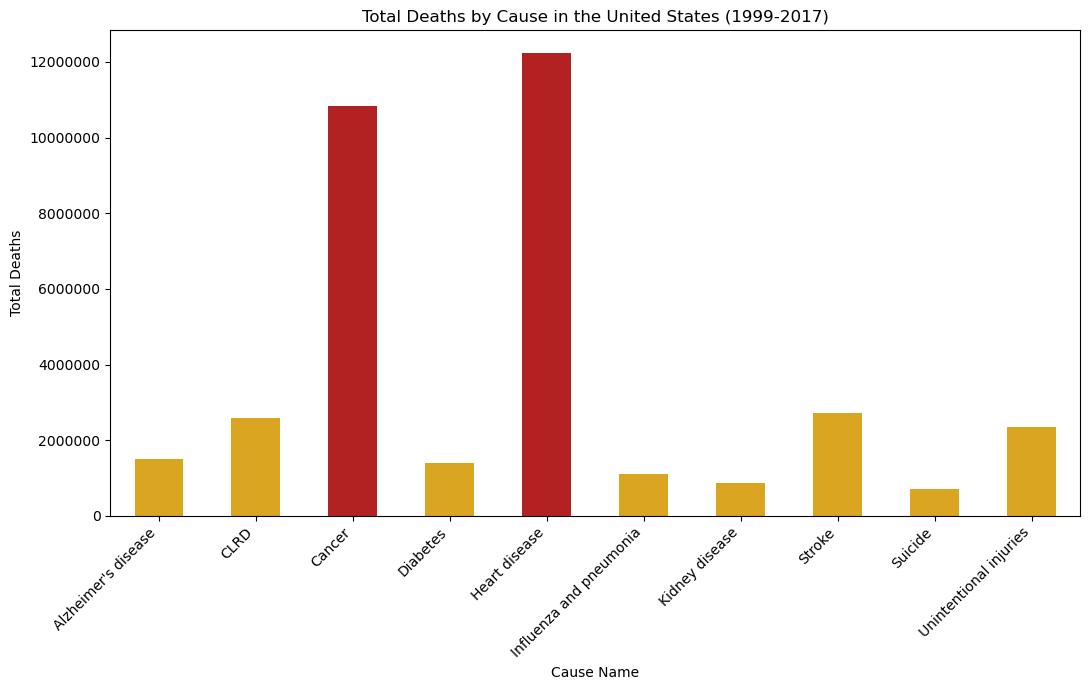

In [28]:
#bar graph showing total deaths per cause over entire dataframe
us_df = death_df[(death_df["State"] == "United States") & 
                 (death_df['Year'].between(1999, 2017))]
us_df = us_df[us_df['Cause Name'] != "All causes"]
cause_deaths = us_df.groupby('Cause Name')['Deaths'].sum()
custom_colors = ["goldenrod", "goldenrod", "firebrick","goldenrod", "firebrick", "goldenrod","goldenrod", "goldenrod", "goldenrod", "goldenrod","goldenrod", "goldenrod"]
plt.figure(figsize=(11, 7))
cause_deaths.plot(kind='bar', color= custom_colors)
plt.title('Total Deaths by Cause in the United States (1999-2017)')
plt.xlabel("Cause Name")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()
# plt.savefig('bar_graph.png', format='png', dpi=300)

<Figure size 640x480 with 0 Axes>

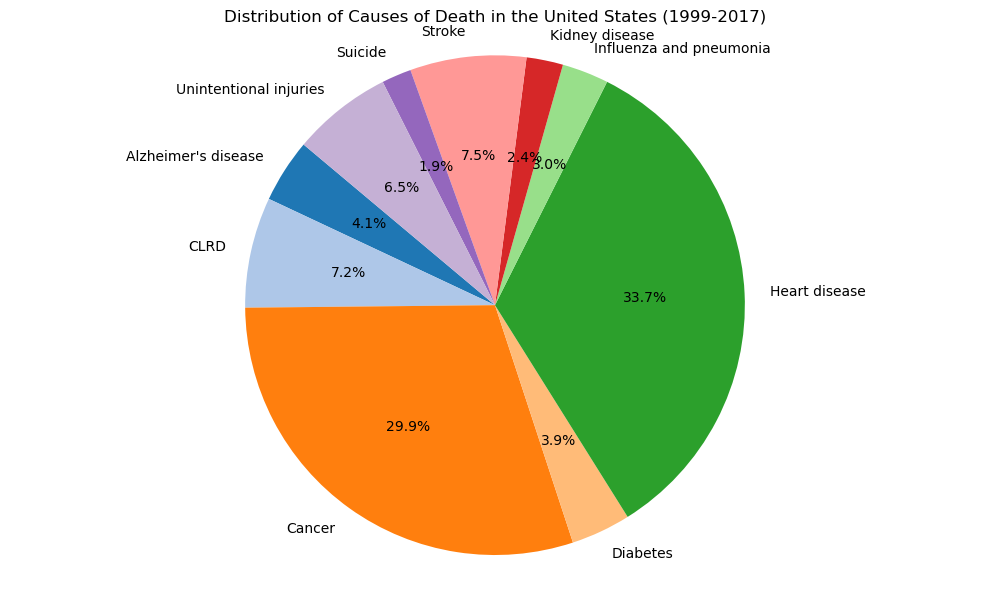

In [36]:
us_df = death_df[(death_df["State"] == "United States") & (death_df["Year"].between(1999, 2017))]
us_df = us_df[us_df['Cause Name'] != "All causes"]
cause_deaths = us_df.groupby('Cause Name')['Deaths'].sum()
plt.figure(figsize=(10, 6))
cause_deaths.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors,)
plt.title('Distribution of Causes of Death in the United States (1999-2017)')
plt.ylabel('')
plt.axis('equal')  
plt.tight_layout()
plt.show()
# plt.savefig('pie_chart.png', format='png', bbox_inches='tight')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

from pathlib import Path

national_death_rates_path= Path("NCHS_-_Leading_Causes_of_Death__United_States.csv")
heart_mortality_path=Path("Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County_20240411.csv")

death_rates_data=pd.read_csv(national_death_rates_path)
heart_mortality_data=pd.read_csv(heart_mortality_path)

death_rates_data.head()
# heart_mortality_data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,"169,936",49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,"2,703",53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,"4,184",56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,"1,625",51.8


In [3]:
heart_disease_rate = death_rates_data.loc[(death_rates_data["Cause Name"]=="Heart disease")&(death_rates_data["State"]=="United States")]
heart_disease_rate.head()



,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
312,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"647,457",165.0
929,2016,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"635,260",165.5
1501,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"633,842",168.5
2074,2014,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"614,348",167.0
2648,2013,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"611,105",169.8


In [4]:
# heart_disease_rate.dtypes

In [5]:
heart_disease_rate["Deaths"]= heart_disease_rate["Deaths"].str.replace(",","").astype(float)
heart_disease_rate.head()

/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_37323/4098109997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_rate["Deaths"]= heart_disease_rate["Deaths"].str.replace(",","").astype(float)


,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
312,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,647457.0,165.0
929,2016,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,635260.0,165.5
1501,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,633842.0,168.5
2074,2014,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,614348.0,167.0
2648,2013,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,611105.0,169.8


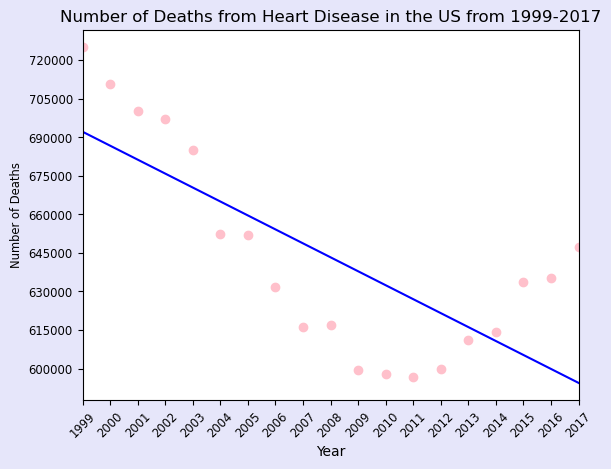

In [6]:
heart_x= heart_disease_rate["Year"]
heart_y= heart_disease_rate["Deaths"]

plt.figure(facecolor="lavender")
plt.scatter(heart_x,heart_y, color= "pink")

plt.xlabel("Year")
plt.ylabel("Number of Deaths", fontsize="small")
plt.title("Number of Deaths from Heart Disease in the US from 1999-2017")

plt.xlim(1999,2017)
plt.xticks(range(1999,2018,1))
plt.xticks(rotation=45, fontsize="small")

plt.yticks(range(600000,750000,15000), fontsize="small")

slope, intercept, rvalue, p_value, std_err =linregress(heart_x, heart_y)
correlation_coefficient=heart_x.corr(heart_y)
plt.plot(heart_x, slope* heart_x +intercept,color="blue")
# plt.text(2007,660000,f"slope= {slope:.2f}", color="blue")
plt.savefig("US_Mortality.png",format="png")




In [7]:
illinois_rates=death_rates_data.loc[(death_rates_data["Cause Name"]=="Heart disease")&(death_rates_data["State"]=="Illinois")]
illinois_rates.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
326,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"25,394",163.3
898,2016,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"25,013",165.7
1470,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"25,652",171.5
2043,2014,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"25,024",169.7
2617,2013,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"24,839",170.9


In [8]:
illinois_rates["Deaths"]= illinois_rates["Deaths"].str.replace(",","").astype(float)
illinois_rates

/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_37323/4285511440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illinois_rates["Deaths"]= illinois_rates["Deaths"].str.replace(",","").astype(float)


,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
326,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,25394.0,163.3
898,2016,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,25013.0,165.7
1470,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,25652.0,171.5
2043,2014,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,25024.0,169.7
2617,2013,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,24839.0,170.9
3189,2012,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,24667.0,172.7
3762,2011,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,24987.0,178.1
4334,2010,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,24959.0,181.7
4922,2009,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,24931.0,184.0
5496,2008,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,26078.0,195.1


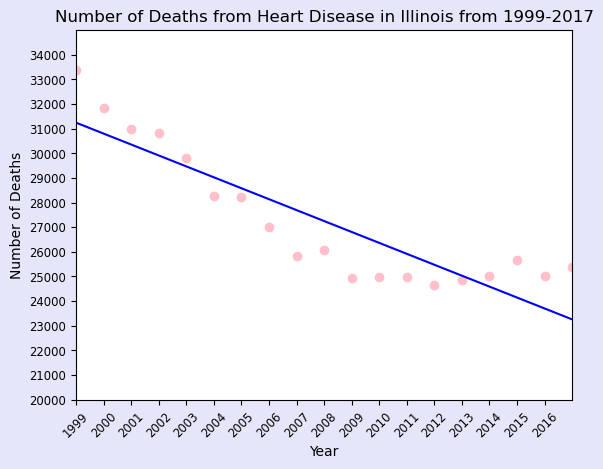

In [9]:
il_x= illinois_rates["Year"]
il_y= illinois_rates["Deaths"]

plt.figure(facecolor="lavender")
plt.scatter(il_x,il_y, color="pink")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.title("Number of Deaths from Heart Disease in Illinois from 1999-2017")

plt.xlim(1999,2017)
plt.xticks(range(1999,2017,1))
plt.xticks(rotation=45, fontsize="small")

plt.ylim(20000,35000)
plt.yticks(range(20000,35000,1000))
plt.yticks(fontsize="small")

slope, intercept, rvalue, p_value, std_err =linregress(il_x, il_y)
correlation_coefficient=il_x.corr(il_y)
plt.plot(il_x, slope* il_x +intercept,color="blue")
# plt.text(2007,28000,f"Slope= {slope:.2f}", color="blue")
plt.savefig("IL_Mortality.png",format="png")


In [10]:
state_rate_start=death_rates_data.loc[(death_rates_data["Cause Name"]=="Heart disease")&(death_rates_data["Year"]==1999)&(death_rates_data["State"]!="United States")]
state_rate_start

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10608,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,"13,419",303.0
10609,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alaska,563,198.0
10610,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arizona,"10,800",223.1
10611,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arkansas,"8,315",287.8
10612,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,California,"71,930",257.3
10613,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Colorado,"6,420",196.3
10614,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Connecticut,"9,127",238.8
10615,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Delaware,"2,011",269.2
10616,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,District of Columbia,"1,652",296.2
10617,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Florida,"51,434",247.7


In [11]:
state_rate_last=death_rates_data.loc[(death_rates_data["Cause Name"]=="Heart disease")&(death_rates_data["Year"]==2017)&(death_rates_data["State"]!= "United States")]
state_rate_last
# state_rate_last.count()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
313,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,"13,110",223.2
314,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alaska,814,135.0
315,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arizona,"12,398",141.9
316,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arkansas,"8,270",223.8
317,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,California,"62,797",142.9
318,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Colorado,"7,060",122.7
319,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Connecticut,"7,138",141.6
320,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Delaware,"1,990",158.4
321,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,District of Columbia,"1,284",189.8
322,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Florida,"46,440",145.8


In [12]:
percent_change=pd.merge(state_rate_start,state_rate_last, how="left", on=("State","Cause Name","113 Cause Name"), suffixes=("_1999","_2017"))
percent_change


,Year_1999,113 Cause Name,Cause Name,State,Deaths_1999,Age-adjusted Death Rate_1999,Year_2017,Deaths_2017,Age-adjusted Death Rate_2017
0,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,"13,419",303.0,2017,"13,110",223.2
1,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alaska,563,198.0,2017,814,135.0
2,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arizona,"10,800",223.1,2017,"12,398",141.9
3,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arkansas,"8,315",287.8,2017,"8,270",223.8
4,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,California,"71,930",257.3,2017,"62,797",142.9
5,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Colorado,"6,420",196.3,2017,"7,060",122.7
6,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Connecticut,"9,127",238.8,2017,"7,138",141.6
7,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Delaware,"2,011",269.2,2017,"1,990",158.4
8,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,District of Columbia,"1,652",296.2,2017,"1,284",189.8
9,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Florida,"51,434",247.7,2017,"46,440",145.8


In [13]:
# cleaning up df to only include values wanted
filtered_df=percent_change[["Cause Name","State", "Deaths_1999","Deaths_2017"]]

filtered_df["Deaths_1999"]= filtered_df["Deaths_1999"].str.replace(",","").astype(float)
filtered_df["Deaths_2017"]= filtered_df["Deaths_2017"].str.replace(",","").astype(float)
filtered_df

/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_37323/587480348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Deaths_1999"]= filtered_df["Deaths_1999"].str.replace(",","").astype(float)
/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_37323/587480348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Deaths_2017"]= filtered_df["Deaths_2017"].str.replace(",","").astype(float)


,Cause Name,State,Deaths_1999,Deaths_2017
0,Heart disease,Alabama,13419.0,13110.0
1,Heart disease,Alaska,563.0,814.0
2,Heart disease,Arizona,10800.0,12398.0
3,Heart disease,Arkansas,8315.0,8270.0
4,Heart disease,California,71930.0,62797.0
5,Heart disease,Colorado,6420.0,7060.0
6,Heart disease,Connecticut,9127.0,7138.0
7,Heart disease,Delaware,2011.0,1990.0
8,Heart disease,District of Columbia,1652.0,1284.0
9,Heart disease,Florida,51434.0,46440.0


In [14]:
# Code was written with help from ChatGPT and references from course materials

# Convert "Deaths_1999" and "Deaths_2017" columns to numeric
filtered_df["Deaths_1999"] = pd.to_numeric(filtered_df["Deaths_1999"])
filtered_df["Deaths_2017"] = pd.to_numeric(filtered_df["Deaths_2017"])

# Initialize list to store percent changes
percent_changes = []

# Calculate percent change for each row
for index, row in filtered_df.iterrows():
    deaths_1999 = row["Deaths_1999"]
    deaths_2017 = row["Deaths_2017"]
    
    # just in case numbers contain 0, 
    if deaths_1999 != 0:
        percent_change_value = ((deaths_2017 - deaths_1999) / deaths_1999) * 100
    else:
        percent_change_value = None  # Set to None if deaths_1999 is zero
        
    percent_changes.append(percent_change_value)

# Add "Percent Change" column to DataFrame
filtered_df["Percent Change"] = percent_changes

filtered_df["Percent Change"] = filtered_df["Percent Change"].map("{:.2f}".format)
# Display DataFrame
filtered_df.head()



/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_37323/285959706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Deaths_1999"] = pd.to_numeric(filtered_df["Deaths_1999"])
/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_37323/285959706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Deaths_2017"] = pd.to_numeric(filtered_df["Deaths_2017"])
/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_37323/285959706.py:24: SettingWithCopyWarning: 
A value i

,Cause Name,State,Deaths_1999,Deaths_2017,Percent Change
0,Heart disease,Alabama,13419.0,13110.0,-2.30
1,Heart disease,Alaska,563.0,814.0,44.58
2,Heart disease,Arizona,10800.0,12398.0,14.80
3,Heart disease,Arkansas,8315.0,8270.0,-0.54
4,Heart disease,California,71930.0,62797.0,-12.70


/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_37323/2114129900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Percent Change'] = pd.to_numeric(filtered_df['Percent Change'])


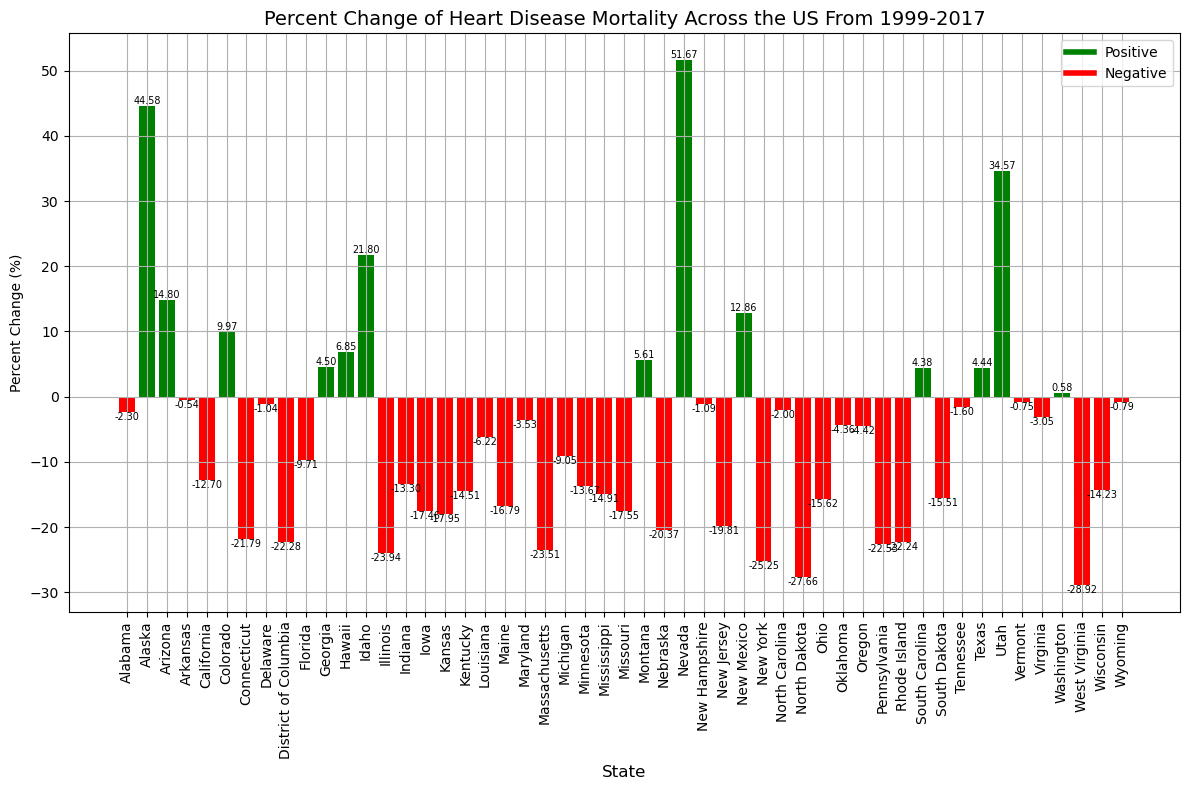

In [15]:

filtered_df['Percent Change'] = pd.to_numeric(filtered_df['Percent Change'])

# Define categories (states) and values (percent changes)
states = filtered_df["State"]
values = filtered_df["Percent Change"]

# code was written with help from chatgpt
colors = ['green' if v >= 0 else 'red' for v in values]


plt.figure(figsize=(12, 8)) 
bars = plt.bar(states, values, color=colors)


plt.xlabel('State', fontsize=12)
plt.ylabel('Percent Change (%)', fontsize=10)
plt.title('Percent Change of Heart Disease Mortality Across the US From 1999-2017', fontsize=14)

# Customize colors in legend, code written with help from chatgpt to include a negative y axis
positive_bar = plt.Line2D([0], [0], color='green', linewidth=4)
negative_bar = plt.Line2D([0], [0], color='red', linewidth=4)
plt.legend([positive_bar, negative_bar], ['Positive', 'Negative'], loc='upper right')

# formatting to add values in text on bars, code written with help from chatgpt
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom' if yval >= 0 else 'top', fontsize="x-small")

# Show the plot
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig("Percent_Change.png", format="png")



In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd



In [3]:
# Getting CSVs into DataFrames
death_df=pd.read_csv("Causes of Death.csv")
heart_df=pd.read_csv("Heart Disease Data.csv")
# Looking at each data set
display(death_df.head())
heart_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,"169,936",49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,"2,703",53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,"4,184",56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,"1,625",51.8


,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


In [4]:
#Dropping 113 Cause Name, will use Cause Name column for analysis
death_df=death_df.drop("113 Cause Name",axis=1)
death_df.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,Unintentional injuries,United States,"169,936",49.4
1,2017,Unintentional injuries,Alabama,"2,703",53.8
2,2017,Unintentional injuries,Alaska,436,63.7
3,2017,Unintentional injuries,Arizona,"4,184",56.2
4,2017,Unintentional injuries,Arkansas,"1,625",51.8


In [5]:
# Filtering to All Causes because want overall Death Rate
allcauses_df=death_df[death_df["Cause Name"]=="All causes"]
allcauses_df


,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
52,2017,All causes,United States,"2,813,503",731.9
53,2017,All causes,Alabama,"53,238",917.7
54,2017,All causes,Alaska,"4,411",708.8
55,2017,All causes,Arizona,"57,758",678.5
56,2017,All causes,Arkansas,"32,588",900.1
...,...,...,...,...,...
10395,1999,All causes,Virginia,"55,320",889.6
10396,1999,All causes,Washington,"43,865",815.1
10397,1999,All causes,West Virginia,"21,049","1,012.30"
10398,1999,All causes,Wisconsin,"46,672",831.5


In [6]:
#Filtering to Only State Data
droprows=allcauses_df["State"] != "United States"
filtered_df=allcauses_df[droprows]
filtered_df

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
53,2017,All causes,Alabama,"53,238",917.7
54,2017,All causes,Alaska,"4,411",708.8
55,2017,All causes,Arizona,"57,758",678.5
56,2017,All causes,Arkansas,"32,588",900.1
57,2017,All causes,California,"268,189",618.7
...,...,...,...,...,...
10395,1999,All causes,Virginia,"55,320",889.6
10396,1999,All causes,Washington,"43,865",815.1
10397,1999,All causes,West Virginia,"21,049","1,012.30"
10398,1999,All causes,Wisconsin,"46,672",831.5


C:\Users\ssark\AppData\Local\Temp\ipykernel_23372\473975584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Age-adjusted Death Rate"]=pd.to_numeric(filtered_df['Age-adjusted Death Rate'], errors='coerce')


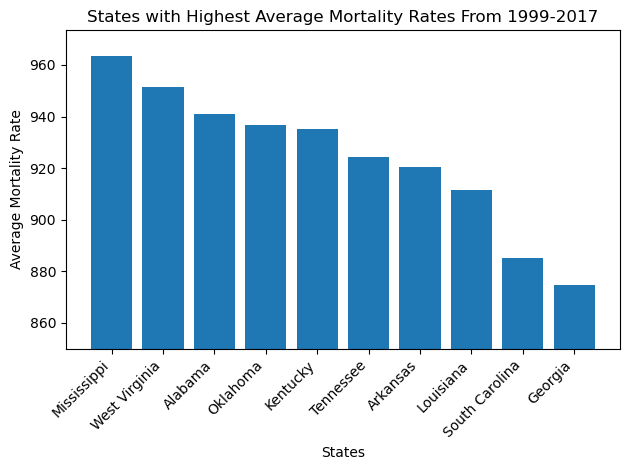

In [7]:
# Making death rate column numeric
filtered_df["Age-adjusted Death Rate"]=pd.to_numeric(filtered_df['Age-adjusted Death Rate'], errors='coerce')
# Grouping for Bar Chart
avg_mortality=filtered_df.groupby('State')['Age-adjusted Death Rate'].mean().sort_values(ascending=False)
# Bar Chart of Average Mortality Rates
plt.bar(avg_mortality.head(10).index,avg_mortality.head(10))
plt.title('States with Highest Average Mortality Rates From 1999-2017')
plt.xlabel('States')
plt.ylabel('Average Mortality Rate')
plt.xticks(rotation=45, ha='right')
plt.ylim(850,max(avg_mortality)+10)
plt.tight_layout()
plt.show()

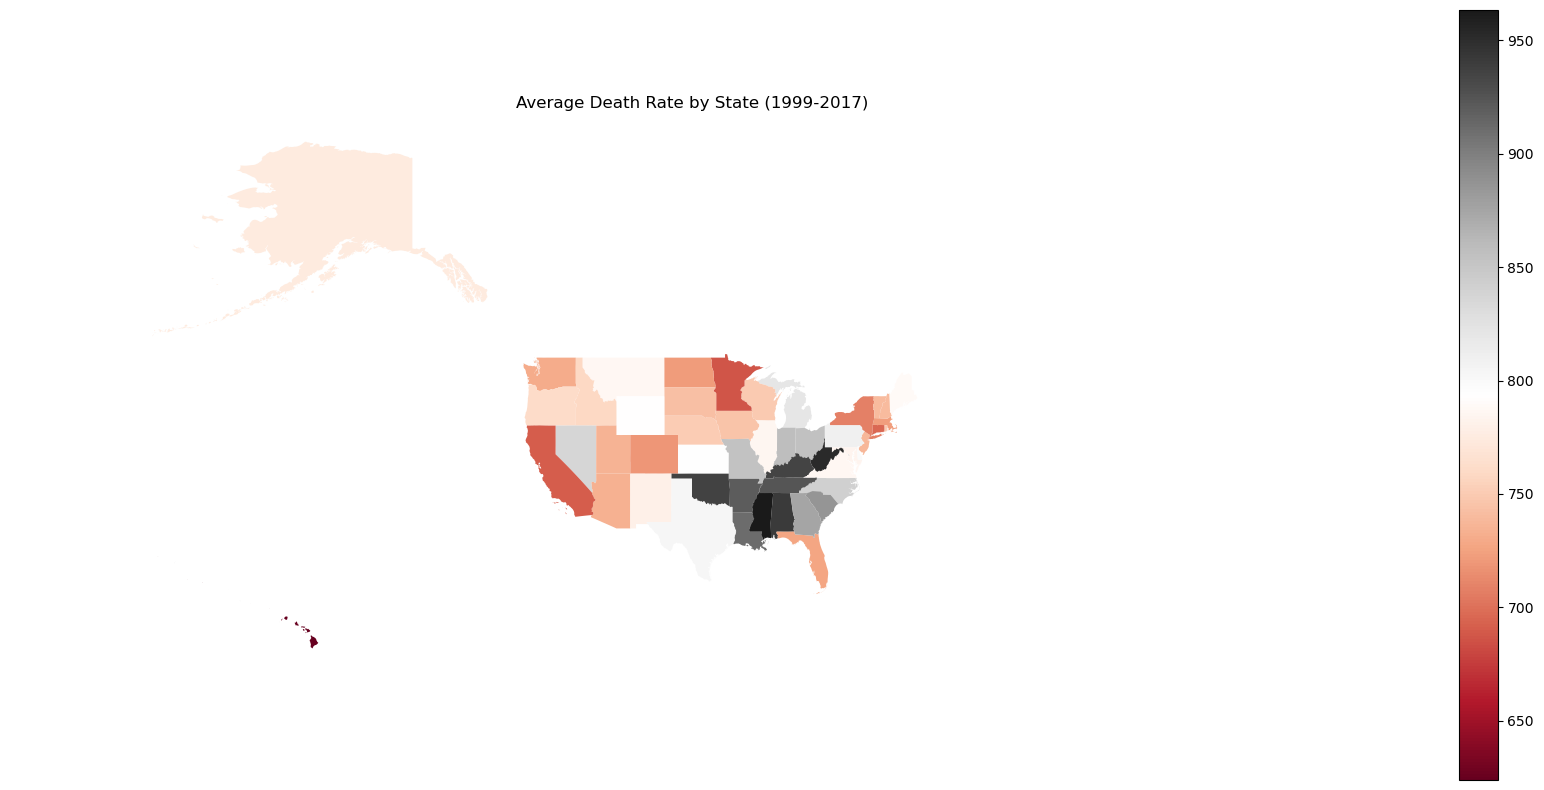

In [8]:
# Getting US Heat Map with help from Google Gemini
us_map = gpd.read_file('gz_2010_us_040_00_500k.json')
merged_map = us_map.merge(avg_mortality.reset_index(), left_on='NAME', right_on='State')
cmap = plt.cm.RdGy
fig, ax = plt.subplots(figsize=(22, 10))
merged_map.plot(column='Age-adjusted Death Rate', ax=ax, cmap=cmap, legend=True)
plt.title('Average Death Rate by State (1999-2017)')
ax.set_axis_off()
plt.xlim(-200,0)

# Show the plot
plt.show()

In [9]:
heartdisease_df=death_df[death_df["Cause Name"]=="Heart disease"]
heartdisease_df.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
312,2017,Heart disease,United States,"647,457",165
313,2017,Heart disease,Alabama,"13,110",223.2
314,2017,Heart disease,Alaska,814,135
315,2017,Heart disease,Arizona,"12,398",141.9
316,2017,Heart disease,Arkansas,"8,270",223.8


In [10]:
droprows2=heartdisease_df["State"] != "United States"
heartfiltered_df=heartdisease_df[droprows2]
heartfiltered_df.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
313,2017,Heart disease,Alabama,"13,110",223.2
314,2017,Heart disease,Alaska,814,135
315,2017,Heart disease,Arizona,"12,398",141.9
316,2017,Heart disease,Arkansas,"8,270",223.8
317,2017,Heart disease,California,"62,797",142.9


C:\Users\ssark\AppData\Local\Temp\ipykernel_23372\4212709129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartfiltered_df["Age-adjusted Death Rate"]=pd.to_numeric(heartfiltered_df['Age-adjusted Death Rate'], errors='coerce')


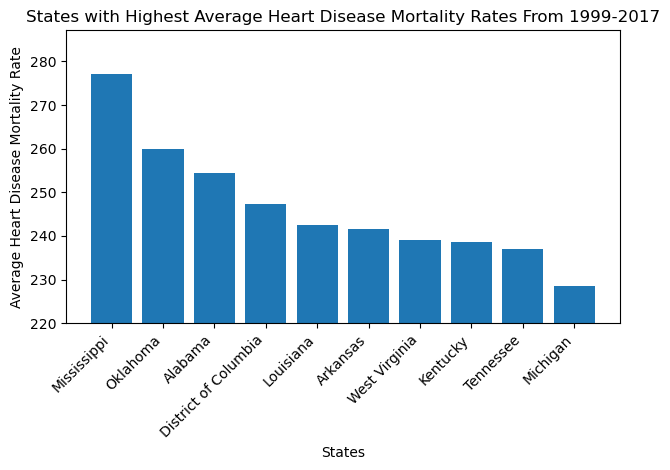

In [11]:
# Making death rate column numeric
heartfiltered_df["Age-adjusted Death Rate"]=pd.to_numeric(heartfiltered_df['Age-adjusted Death Rate'], errors='coerce')
# Grouping for Bar Chart
heart_mortality =heartfiltered_df.groupby('State')['Age-adjusted Death Rate'].mean().sort_values(ascending=False)
# Bar Chart of Average Heart Attack Mortality Rates
plt.bar(heart_mortality.head(10).index,heart_mortality.head(10))
plt.title('States with Highest Average Heart Disease Mortality Rates From 1999-2017')
plt.xlabel('States')
plt.ylabel('Average Heart Disease Mortality Rate')
plt.xticks(rotation=45, ha='right')
plt.ylim(220,max(heart_mortality)+10)
plt.tight_layout()
plt.show()

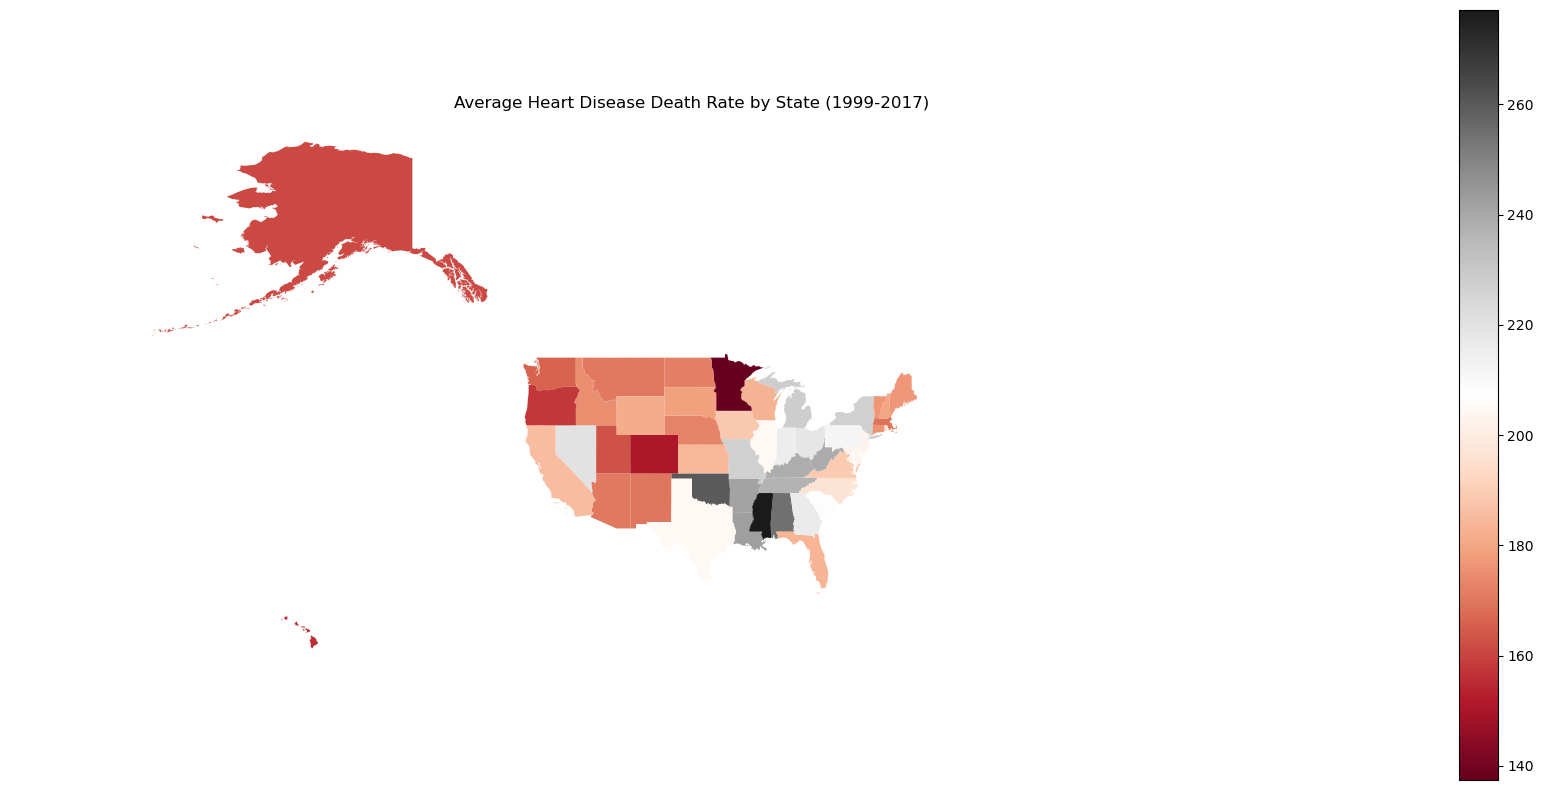

In [12]:
merged_map = us_map.merge(heart_mortality.reset_index(), left_on='NAME', right_on='State')
cmap = plt.cm.RdGy
fig, ax = plt.subplots(figsize=(22, 10))
merged_map.plot(column='Age-adjusted Death Rate', ax=ax, cmap=cmap, legend=True)
plt.title('Average Heart Disease Death Rate by State (1999-2017)')
ax.set_axis_off()
plt.xlim(-200,0)

# Show the plot
plt.show()

In [157]:
%matplotlib widget

In [158]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np



In [159]:
csv_path = Path("/Users/cillian/Downloads/NCHS_-_Leading_Causes_of_Death__United_States (1).csv")
death_df = pd.read_csv(csv_path)

death_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,"169,936",49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,"2,703",53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,"4,184",56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,"1,625",51.8


In [160]:
csv_path = Path("/Users/cillian/Downloads/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County_20240411.csv")
heart_df = pd.read_csv(csv_path)

heart_df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


In [161]:
heart2_df = heart_df.rename(columns=
                            {"LocationAbbr" : "State",
                             "Data_Value" : "Value",
                              "Stratification1" : "Gender",
                               "Stratification2" : "Race/Ethnicity"
                               })
heart2_df.head()

,Year,State,LocationDesc,GeographicLevel,DataSource,Class,Topic,Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Gender,StratificationCategory2,Race/Ethnicity,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


In [162]:
heart3_df = heart2_df[["Year","State","Value","Gender","Race/Ethnicity"]]
heart3_df.head()

,Year,State,Value,Gender,Race/Ethnicity
0,2014,AK,105.3,Overall,Overall
1,2014,AK,211.9,Overall,Overall
2,2014,AK,257.9,Overall,Overall
3,2014,AK,351.6,Overall,Overall
4,2014,AK,NaN,Overall,Overall


In [163]:
heart4_df = heart3_df.loc[(heart3_df["Gender"] == "Male") | (heart3_df["Gender"] == "Female"), :]
heart4_df.head()

,Year,State,Value,Gender,Race/Ethnicity
27,2014,AK,347.9,Male,Overall
28,2014,AK,332.1,Male,Overall
29,2014,AK,489.8,Male,Overall
30,2014,AK,NaN,Male,Overall
31,2014,AK,401.2,Male,Overall


In [164]:
heart4_df["Race/Ethnicity"].unique()

array(['Overall', 'White', 'Black', 'Hispanic',
       'American Indian and Alaskan Native', 'Asian and Pacific Islander'],
      dtype=object)

In [165]:
heart5_df = heart4_df.loc[(heart4_df["Race/Ethnicity"] == "White") | (heart4_df["Race/Ethnicity"] == "Black") | (heart4_df["Race/Ethnicity"] == "Hispanic") | (heart4_df["Race/Ethnicity"] == "American Indian and Alaskan Native") | (heart4_df["Race/Ethnicity"] == "Asian and Pacific Islander"), :]
heart5_df

,Year,State,Value,Gender,Race/Ethnicity
101,2014,AK,NaN,Male,White
102,2014,AK,317.5,Male,White
103,2014,AK,NaN,Male,White
104,2014,AK,NaN,Male,White
105,2014,AK,400.7,Male,White
...,...,...,...,...,...
59071,2014,TX,NaN,Male,Asian and Pacific Islander
59072,2014,TX,NaN,Male,Black
59073,2014,IA,NaN,Female,Asian and Pacific Islander
59074,2014,WV,NaN,Female,Asian and Pacific Islander


In [166]:
heart6_df = heart5_df.dropna(how='any')
heart6_df = heart6_df.set_index("Year")
heart6_df

,State,Value,Gender,Race/Ethnicity
Year,,,,
2014,AK,317.5,Male,White
2014,AK,400.7,Male,White
2014,AK,401.0,Male,White
2014,AK,385.5,Male,White
2014,AK,281.6,Male,White
...,...,...,...,...
2014,IA,45.2,Male,Hispanic
2014,FL,184.3,Male,Asian and Pacific Islander
2014,KS,142.3,Female,Asian and Pacific Islander


In [167]:
females = heart6_df[heart6_df["Gender"] == "Female"]
female_average = females["Value"].mean()
female_average


274.978471411902

In [168]:
females["Value"].std()

105.88712189121081

In [169]:
males = heart6_df[heart6_df["Gender"] == "Male"]
male_average = males["Value"].mean()
male_average


424.6979947448486

In [170]:
males["Value"].std()

165.34239991296735

In [171]:
gender_averages = pd.DataFrame({"Female": [275.0], "Male": [424.7]})
gender_averages

,Female,Male
0,275.0,424.7


In [172]:
sum_gen_df = pd.DataFrame({"Gender": ["Female", "Male"], "Value": [275.0, 424.7]})
sum_gen_df

,Gender,Value
0,Female,275.0
1,Male,424.7


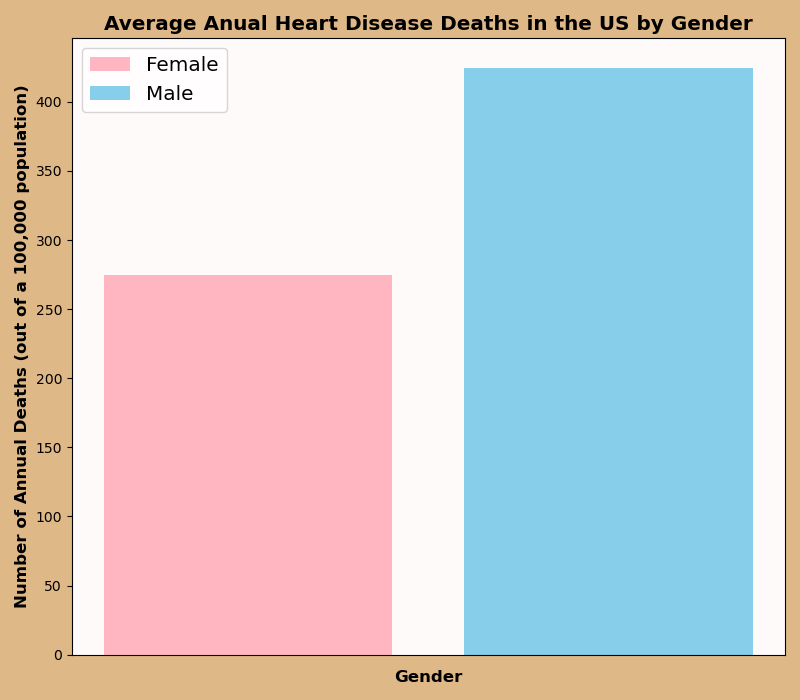

In [173]:
plt.clf()
plt.figure(figsize=(8, 7))
colors = ["lightpink", "skyblue"]
bars = plt.bar(sum_gen_df["Gender"], sum_gen_df["Value"], color=colors, label=sum_gen_df["Gender"])
#plt.bar(fake_df["Gender"], fake_df["Value"], width = 0.3, align="center", color=colors)
plt.legend(fontsize="x-large")
plt.xlabel("Gender", weight = "bold", fontsize="large")
plt.ylabel("Number of Annual Deaths (out of a 100,000 population)", weight = "bold", fontsize="large")
plt.title("Average Anual Heart Disease Deaths in the US by Gender", weight = "bold", fontsize="x-large")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.gca().set_xticklabels([])
plt.gcf().set_facecolor('burlywood')
plt.gca().set_facecolor('snow')
#std_values = np.array([105.9,165.3])
#plt.errorbar(sum_eth_df["Gender"], sum_eth_df["Value"], yerr=std_values, fmt='none', ecolor='black', capsize=5, label='Std Dev')
plt.tight_layout()
plt.show()
plt.savefig("gender", format="png")

In [174]:
heart6_df["Race/Ethnicity"].value_counts()

Race/Ethnicity
White                                 6358
Black                                 3633
Hispanic                              2107
Asian and Pacific Islander            1186
American Indian and Alaskan Native     803
Name: count, dtype: int64

In [175]:
white = heart6_df[heart6_df["Race/Ethnicity"] == "White"]
white_average = white["Value"].mean()
white_average

369.1367411135578

In [176]:
white["Value"].std()

121.21771558845361

In [177]:
black = heart6_df[heart6_df["Race/Ethnicity"] == "Black"]
black_average = black["Value"].mean()
black_average

438.19295348197085

In [178]:
black["Value"].std()

145.71711292360646

In [179]:
hispanic = heart6_df[heart6_df["Race/Ethnicity"] == "Hispanic"]
hispanic_average = hispanic["Value"].mean()
hispanic_average

216.82249644043665

In [180]:
hispanic["Value"].std()

101.69133859170134

In [181]:
AIAN = heart6_df[heart6_df["Race/Ethnicity"] == "American Indian and Alaskan Native"]
AIAN_average = AIAN["Value"].mean()
AIAN_average

441.16674968866755

In [182]:
API = heart6_df[heart6_df["Race/Ethnicity"] == "Asian and Pacific Islander"]
API_average = API["Value"].mean()
API_average

173.8746205733558

In [183]:
ethnicity_averages = pd.DataFrame({"White": [369.1], "Black": [438.2], "Hispanic": [216.8], "American Indian and Alaskan Native": [441.2], "Asian and Pacific Islander": [173.9]})
ethnicity_averages

,White,Black,Hispanic,American Indian and Alaskan Native,Asian and Pacific Islander
0,369.1,438.2,216.8,441.2,173.9


In [184]:
sum_eth_df = pd.DataFrame({"Race/Ethnicity": ["White", "Black", "Hispanic", "American Indian and Alaskan Native", "Asian and Pacific Islander"], "Value": [369.1, 438.2, 216.8, 441.2, 173.9]})
sum_eth_df

,Race/Ethnicity,Value
0,White,369.1
1,Black,438.2
2,Hispanic,216.8
3,American Indian and Alaskan Native,441.2
4,Asian and Pacific Islander,173.9


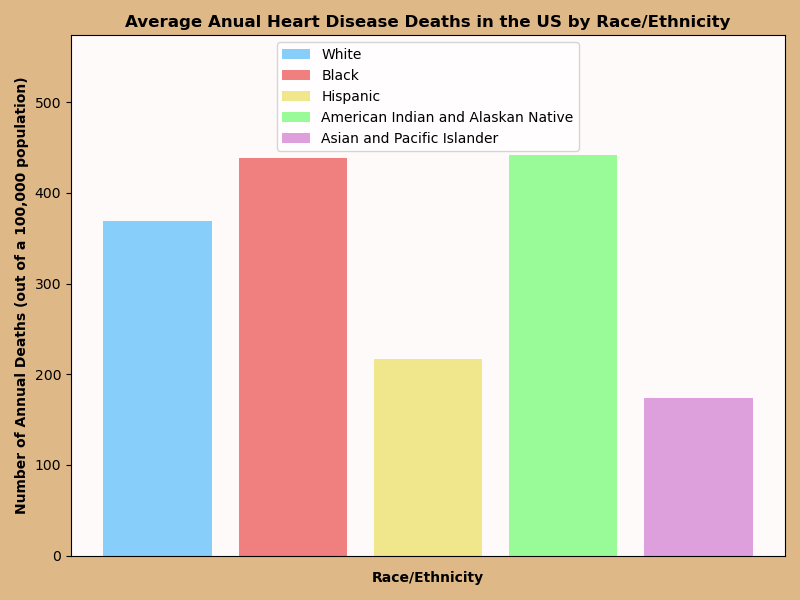

In [185]:
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'lightcoral', 'khaki', 'palegreen', 'plum']
bars = plt.bar(sum_eth_df["Race/Ethnicity"], sum_eth_df["Value"], color=colors, label=sum_eth_df["Race/Ethnicity"])
plt.legend(loc="upper center")
plt.ylim(0, max(sum_eth_df["Value"]) * 1.3)  
plt.ylabel("Number of Annual Deaths (out of a 100,000 population)", weight = "bold")
plt.xlabel("Race/Ethnicity", weight = "bold")
plt.title("Average Anual Heart Disease Deaths in the US by Race/Ethnicity", weight = "bold")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.gca().set_xticklabels([])
plt.gcf().set_facecolor('burlywood')
plt.gca().set_facecolor('snow')
#std_values = np.array([121.2, 145.7, 101.7, 231.1, 76.1])
#plt.errorbar(sum_eth_df["Race/Ethnicity"], sum_eth_df["Value"], yerr=std_values, fmt='none', ecolor='black', capsize=5, label='Std Dev')
plt.tight_layout()
plt.show()
plt.savefig("ethnicity", format="png")